In [2]:
import matplotlib.pyplot as plt
import time
import random

In [3]:
def data_from_fasta(filename):
    print("Reading from fasta...")
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
def shingles_set(text, n):
    print("Creating Shingles...")
    
    S = set()    
    N = len(text)
    
    for i in range(N - n + 1):
        S.add(text[i : i + n])
    
    return S

In [5]:
def ng_score(a, b, n = 3):
    print("Compute Score...")
    
    S_a, S_b = shingles_set(a, n), shingles_set(b, n)
    
    score = len(S_a.intersection(S_b))    
    score /= max(len(S_a), len(S_b))
    
    return score

In [17]:
def dot_plot_matrix(a, b, n, score):
    print("Dot Plot Matrix...")
    
    rows, cols = len(a) - n + 1, len(b) - n + 1

    #matrix = [[0] * cols for i in range(rows)]
    plt.title("Similarity Between Genomes " + str(score))

    for i in range(min(rows, cols)):
        if a[i : i + n] == b[i : i + n]:
            #print(i)
            plt.plot(i,i,'bo', markersize = 0.5)
    
    plt.xlim(0,cols)
    plt.ylim(0, rows)
            
    plt.xlabel("Genome B" + " (" + "Length : " + str(cols + n - 1) + ")")
    plt.ylabel("Genome A" + " (" + "Length : " + str(rows + n - 1) + ")")
    
    plt.rcParams["figure.figsize"] = (10,10)
            
    plt.show()

In [18]:
def test(n = 3):
 
    genome = data_from_fasta("../Dataset/lambda_virus.fa")
    a, b = genome, genome
    
    for i in range(10000):
        index = random.randint(0, len(b))
        b = b[:index] + 'C' + b[index + 1:]
    
    
    print(len(a), len(b))

    start = time.time()
    
    score = ng_score(a, b, n)
    print("Global Similarity Score", score)
    dot_plot_matrix(a, b, n, score)
    
    end = time.time()
    
    print("Time for Execution: ", end - start)   

Reading from fasta...
48502 48503
Compute Score...
Creating Shingles...
Creating Shingles...
Global Similarity Score 0.03762221030485541
Dot Plot Matrix...


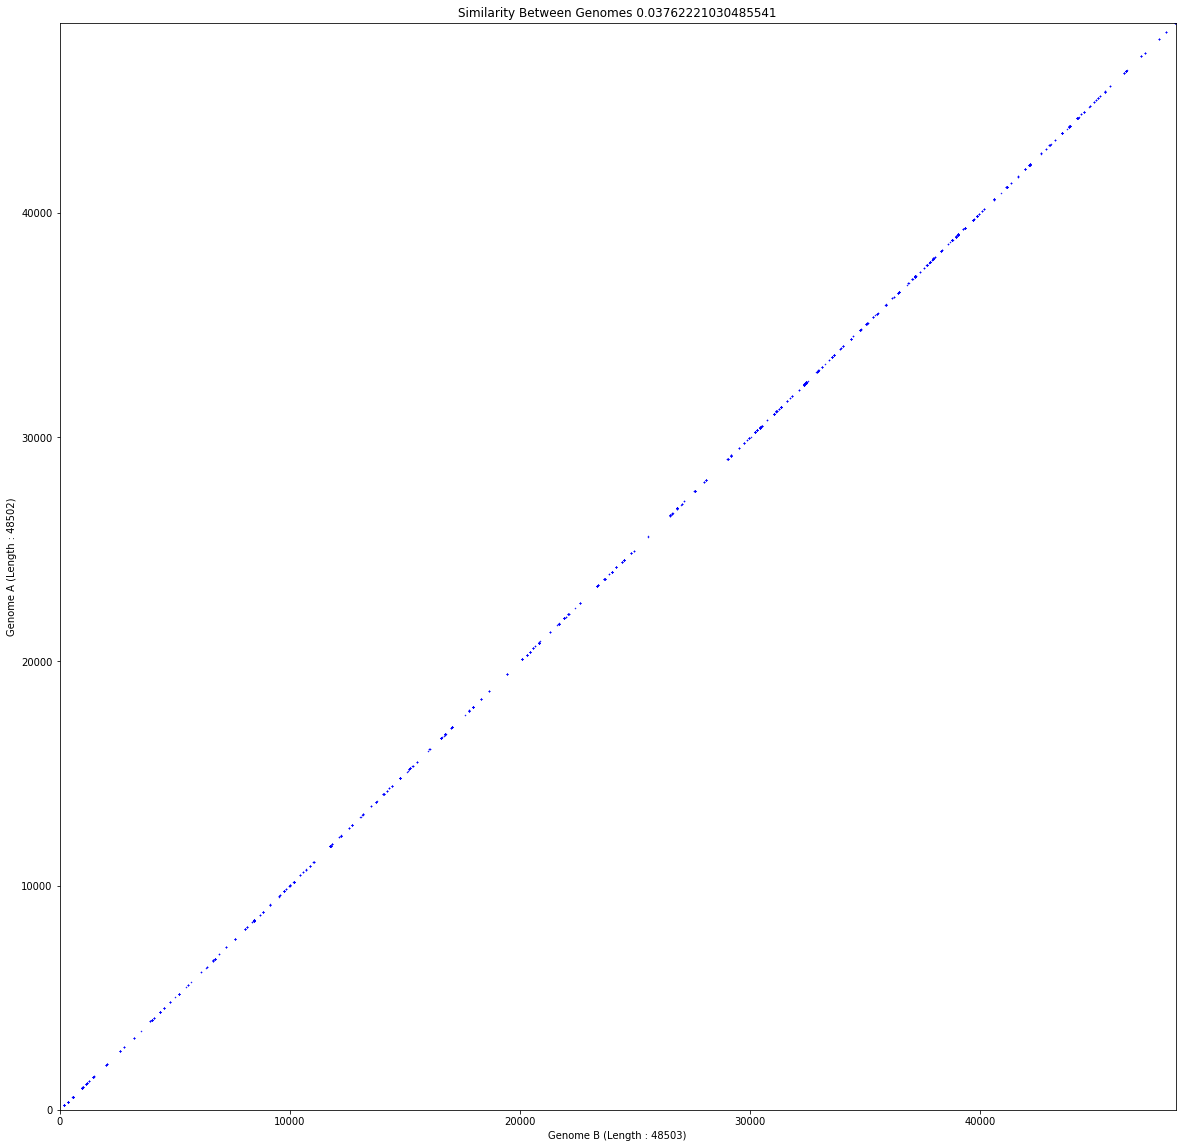

Time for Execution:  8.921396017074585


In [19]:
test(22)